# Acidentes em rodovias federais 2021 - 2023

No Brasil, acontecem tantos acidentes em rodovias que parece que fomos anestesiados. Constantemente, vemos os jornais noticiarem que determinado feriado foi marcado por tragédias em nossas rodovias. Também não é incomum ouvir relatos de conhecidos que presenciaram ou vivenciaram um ou mais acidentes durante uma viagem ou passeio.

Conforme os números divulgados pela **Polícia Rodoviária Federal (PRF)**  referente aos acidentes em rodovias federais nos anos de 2021 até outubro de 2023 são preocupantes. Em 2021, ocorreram 64.539 casos, sendo 4.664 com vítimas fatais (7% dos casos), totalizando 5.396 mortos. Já em 2022, os números quase não mudam, com 64.547 acidentes, 4.662 com vítimas fatais (novamente 7% dos casos) e 5.439 pessoas mortas. Até outubro de 2023, os registros seguem a mesma tendência, com 55.464 acidentes, 4.007 que resultando em mortes (também 7%) e 4.633 óbitos.

Nota-se um comportamento muito similar nos últimos 3 anos. Parece até que as campanhas de atenção ao volante, fiscalização e manutenção das vias não surtiram efeito ou não foram implementadas corretamente.

## Objetivos
Visando isso, decidi criar um estudo usando conhecimentos e técnicas de **ciência e análise de dados** para auxiliar na redução de sinistros. Portanto, defini dois **objetivos**:

1.   Identificar as principais características que contribuem para acidentes com vítimas fatais;
2.   Criar uma variável preditiva com base estatística para estimar a probabilidade desses incidentes.

É importante ressaltar que, embora os números já tenham sido mais elevados, optei por analisar um período de 3 anos para garantir uma janela temporal adequada e trabalhar com uma volumetria de observações significativa.


## Metodologia

Neste projeto vou utilizar a metodologia **CRISP-DM** (Cross Industry Standard Process for Data Mining), método comum para mineração de dados. A característica que mais interessa é seu formato cíclico, que permite sempre a retomada de determinada etapa e aplicabilidade em projetos de diferentes tipos, conforme imagem abaixo:

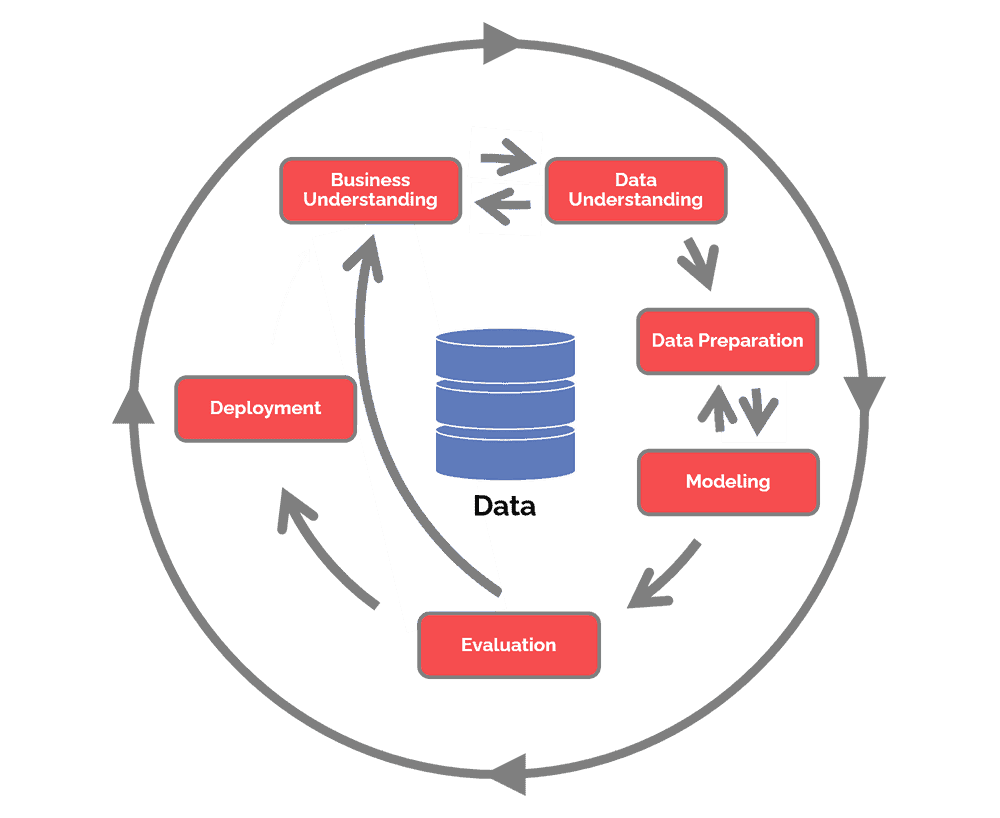


### Descrição das etapas da metodologia:
*   **Business Understanding**: Entendimento do negócio;
*   **Data Understanding**: Coleta dos dados e avaliação de qualidade;
*   **Data Preparation**: Preparar os dados para serem utilizados em modelos;
*   **Evaluation**: Avaliação dos modelos conforme os objetivos do projeto;
*   **Deployment**: Implementação do modelo condizente em ambiente de produção.

## Etapas do projeto
Logo, dividirei o projeto em 4 etapas utilizando a metodologia como base. Cada etapa terá um notebook próprio e seguirá uma sequência, sendo ela:

1.    **Data Clean**: Descrição das variáveis, juste dos dados, identificação de valores nulos e correção de valores mal preenchidos;
2.    **Statistic**: Análise exploratória dos dados, identificação de outliers e distribuição dos dados;
3.    **Preprocessing**: Transformar as features categóricas ou numéricas para que possam ser utilizadas no modelo;
4.    **Model**: Criação, comparação e avaliação de modelos.


## Descrição das features

**Dicionário das Variáveis:** Essa etapa tem como objetivo identificar e entender quais são as variaveis disponiveis para utilização, conforme a documentação atualizada da PRF.


- **id**: Variável com valores numéricos, representando o identificador do acidente.

- **data_inversa**: Data da ocorrência no formato dd/mm/aaaa.

- **dia_semana**: Dia da semana da ocorrência.

- **horário**: Horário da ocorrência no formato hh:mm:ss.

- **uf**: Unidade da Federação.

- **br**: Variável com valores numéricos, representando o identificador da BR do acidente.

- **km**: Identificação do quilômetro onde ocorreu o acidente, com valor mínimo de 0,1 km e com a casa decimal separada por ponto.

- **municipio**: Nome do município de ocorrência do acidente

- **causa_acidente**: Identificação da causa principal do acidente. Neste conjunto de dados são excluídos os acidentes com a variável causa principal igual a “Não”.

- **tipo_acidente**: Identificação do tipo de acidente. Ex.: Colisão frontal, Saída de pista, etc. Neste conjunto de dados são excluídos os tipos de acidentes com ordem maior ou igual a dois. A ordem do acidente demonstra a sequência cronológica dos tipos presentes na mesma ocorrência.

- **classificação_acidente**: Classificação quanto à gravidade do acidente: Sem Vítimas, Com Vítimas Feridas, Com Vítimas Fatais e Ignorado.

- **fase_dia**: Fase do dia no momento do acidente. Ex. Amanhecer, Pleno dia, etc.

- **sentido_via**: Sentido da via considerando o ponto de

- **colisão**: Crescente e decrescente.

- **condição_meteorologica**: Condição meteorológica no momento do acidente: Céu claro, chuva, vento, etc

- **tipo_pista**: Tipo da pista considerando a quantidade de faixas: Dupla, simples ou múltipla.

- **tracado_via**: Descrição do traçado da via

- **uso_solo**: Descrição sobre as características do local do acidente: Urbano=Sim;Rural=Não.

- **pessoas**: Total de pessoas envolvidas na ocorrência.

- **mortos**: Total de pessoas mortas envolvidas na ocorrência

- **feridos_leves**: Total de pessoas com ferimentos leves envolvidas na ocorrência.

- **feridos_graves**: Total de pessoas com ferimentos graves envolvidas na ocorrência.

- **ilesos**: Total de pessoas ilesas envolvidas na ocorrência.

- **ignorados**: Total de pessoas envolvidas na ocorrência e que não se soube o estado físico

- **feridos**: Total de pessoas feridas envolvidas na ocorrência (é a soma dos feridos leves com os graves).

- **veiculos**: Total de veículos envolvidos na ocorrência.

- **latitude**: Latitude do local do acidente em formato geodésico decimal.

- **longitude**: Longitude do local do acidente em formato geodésico decimal.

- **regional**: Superintendência regional da PRF cujo acidente ocorreu dentro dos limites de sua circunscrição. Atenção nem sempre a UF da regional coincide com a UF do acidente. Ex: A circunscrição da SPRF-DF grande parte está localizada a UF “GO”.

- **delegacia**: Delegacia da PRF cujo acidente ocorreu dentro dos limites de sua circunscrição

- **uop**: UOP= unidade operacional. Unidade operacional da PRF cujo acidente ocorreu dentro dos limites de sua circunscrição.




##Fontes:
- Acidentes PRF: https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf

- Dashboard Acidentes em rodovias federais: https://www.cnt.org.br/painel-acidente

- Metodologia CRISP-DM: https://www.knowsolution.com.br/voce-sabe-o-que-e-metodologia-crisp-dm-descubra-aqui/


In [1]:
# Bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Visualizar todas as colunas das bases
pd.set_option('display.max_columns', None)

# Datasets dos acidentes por ocorrencia entre 2021 até 2023 (outubro)
df_2021 = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Federal-road-accidents---Brazil/main/0%20-%20Datasets/datatran2021.csv',encoding='ISO-8859-1', sep= ';')
df_2022 = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Federal-road-accidents---Brazil/main/0%20-%20Datasets/datatran2022.csv',encoding='ISO-8859-1', sep= ';')
df_2023 = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Federal-road-accidents---Brazil/main/0%20-%20Datasets/datatran2023.csv',encoding='ISO-8859-1', sep= ';')

# Unifica as 3 bases
df = pd.concat([df_2021,df_2022,df_2023], ignore_index = True)
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116.0,453,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Amanhecer,Crescente,Nublado,Dupla,Curva,Não,1,0,1,0,0,0,1,1,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174.0,937,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,6,0,1,0,5,0,1,4,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,3,0,2,0,0,1,2,2,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493.0,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Curva,Sim,2,0,1,0,1,0,1,2,"-22,6687122","-43,01862696",SPRF-RJ,DEL02-RJ,UOP04-DEL02-RJ
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393.0,252,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Nublado,Simples,Reta,Não,3,0,1,1,1,0,2,2,"-22,43422023","-43,77561487",SPRF-RJ,DEL05-RJ,UOP02-DEL05-RJ


In [3]:
# Função info() mostra os tipos de cada campo e o preenchimento
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184550 entries, 0 to 184549
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      184550 non-null  float64
 1   data_inversa            184550 non-null  object 
 2   dia_semana              184550 non-null  object 
 3   horario                 184550 non-null  object 
 4   uf                      184550 non-null  object 
 5   br                      184057 non-null  float64
 6   km                      184057 non-null  object 
 7   municipio               184550 non-null  object 
 8   causa_acidente          184550 non-null  object 
 9   tipo_acidente           184550 non-null  object 
 10  classificacao_acidente  184550 non-null  object 
 11  fase_dia                184550 non-null  object 
 12  sentido_via             184550 non-null  object 
 13  condicao_metereologica  184550 non-null  object 
 14  tipo_pista          

# Missing values

Como visto na função "info()" existe alguns campos com **missing values** (valores ausentes), a presente desse tipo pode causar problemas na criação do modelo, além de que não atribui nenhum informação valida. Adotarei uma tolerancia de **5%**, portanto, **variaveis acima serão removidas e abaixo serão tratadas.**

In [4]:
# Proporção de valores nulos
(df.isnull().sum() / df.count()) * 100

id                        0.000000
data_inversa              0.000000
dia_semana                0.000000
horario                   0.000000
uf                        0.000000
br                        0.267852
km                        0.267852
municipio                 0.000000
causa_acidente            0.000000
tipo_acidente             0.000000
classificacao_acidente    0.000000
fase_dia                  0.000000
sentido_via               0.000000
condicao_metereologica    0.000000
tipo_pista                0.000000
tracado_via               0.000000
uso_solo                  0.000000
pessoas                   0.000000
mortos                    0.000000
feridos_leves             0.000000
feridos_graves            0.000000
ilesos                    0.000000
ignorados                 0.000000
feridos                   0.000000
veiculos                  0.000000
latitude                  0.000000
longitude                 0.000000
regional                  0.003793
delegacia           

Como visto, as variaveis que possuem nulos não chegam a 1% de sua totalidade, portanto, variaveis cateogoricas serão substituidas pela moda(valor com maior frequencia) e para as númericas será incluso a média.

In [5]:
# Trocando "," por "." na feature km e convertendo para float
df['km'] = df['km'].str.replace(',','.').astype(float)

# Substituindo valores na pela média do campo km
df['km'].fillna(df['km'].mean(), inplace = True)

# Substituindo os campos categoricos com valores ausentes pela moda
df[['br', 'regional', 'delegacia', 'uop']] = df[['br', 'regional', 'delegacia', 'uop']].apply(lambda col: col.fillna(col.mode().iloc[0]))

# Conferindo a tratativa
(df.isnull().sum() / df.count()) * 100

id                        0.0
data_inversa              0.0
dia_semana                0.0
horario                   0.0
uf                        0.0
br                        0.0
km                        0.0
municipio                 0.0
causa_acidente            0.0
tipo_acidente             0.0
classificacao_acidente    0.0
fase_dia                  0.0
sentido_via               0.0
condicao_metereologica    0.0
tipo_pista                0.0
tracado_via               0.0
uso_solo                  0.0
pessoas                   0.0
mortos                    0.0
feridos_leves             0.0
feridos_graves            0.0
ilesos                    0.0
ignorados                 0.0
feridos                   0.0
veiculos                  0.0
latitude                  0.0
longitude                 0.0
regional                  0.0
delegacia                 0.0
uop                       0.0
dtype: float64

## Não Informado

Durante a exploração do dataframe identifiquei uma categoria utilizada pela PRF como "Não Informado", essa categoria não representa em nada quaisquer valor, em outras palavras é um valor nulo "preenchido", logo será tratado como tal.

In [6]:
# Percentual de "Não Informado" por campo
((df =='Não Informado').sum() / df.count())*100

id                         0.000000
data_inversa               0.000000
dia_semana                 0.000000
horario                    0.000000
uf                         0.000000
br                         0.000000
km                         0.000000
municipio                  0.000000
causa_acidente             0.000000
tipo_acidente              0.000000
classificacao_acidente     0.000000
fase_dia                   0.000000
sentido_via                0.267136
condicao_metereologica     0.000000
tipo_pista                 0.000000
tracado_via               17.231103
uso_solo                   0.000000
pessoas                    0.000000
mortos                     0.000000
feridos_leves              0.000000
feridos_graves             0.000000
ilesos                     0.000000
ignorados                  0.000000
feridos                    0.000000
veiculos                   0.000000
latitude                   0.000000
longitude                  0.000000
regional                   0

Como observado, somente dois campos possuem o "Não Informado", tracado_via por possuir 17% será desconsiderado e sentido_via por ter 0,26% será preenchido pela moda.

In [7]:
# Remoção do campo tracado_via
df.drop('tracado_via', axis = 1, inplace = True)

# Substituição do sentido_via pela moda
sentido_via_mode = df['sentido_via'].mode().iloc[0]
df['sentido_via'].replace('Não Informado',sentido_via_mode, inplace = True)

# Validando alteração
((df =='Não Informado').sum() / df.count())*100

id                        0.0
data_inversa              0.0
dia_semana                0.0
horario                   0.0
uf                        0.0
br                        0.0
km                        0.0
municipio                 0.0
causa_acidente            0.0
tipo_acidente             0.0
classificacao_acidente    0.0
fase_dia                  0.0
sentido_via               0.0
condicao_metereologica    0.0
tipo_pista                0.0
uso_solo                  0.0
pessoas                   0.0
mortos                    0.0
feridos_leves             0.0
feridos_graves            0.0
ilesos                    0.0
ignorados                 0.0
feridos                   0.0
veiculos                  0.0
latitude                  0.0
longitude                 0.0
regional                  0.0
delegacia                 0.0
uop                       0.0
dtype: float64

# Feature Engineer

A principal ideia nesta etapa é gerar **novas features** com base nas que já existem ou **transformá-las** para um novo formato, de modo que assim possam ser utilizadas no estudo. Para facilitar o entendimento e análise, separarei por tópico.

In [8]:
# Datas
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format = '%Y-%m-%d') # Definir como data e ajustar o formato

# Quebrar por ano, mês e dia
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month
df['dia'] = df['data_inversa'].dt.day

# Campo separado para analise exploratoria
df['ano_mes'] = df['data_inversa'].dt.to_period('M')

In [9]:
# Tempo
# Separar para horas e minutos, segundos não estão preenchidos no campo original
df[['horas','minutos']] = df['horario'].str.split(':', expand = True)[[0,1]]
df[['horas','minutos']] = df[['horas','minutos']].astype(int)

In [10]:
# Localização
# Trocar "," por "."
df[['latitude','longitude']] = df[['latitude','longitude']].apply(lambda x: x.str.replace(',','.').astype(float))

In [11]:
# Região
# Gerar um campo com a região que pertence o estado
mapeamento_regioes = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AM': 'Norte', 'AP': 'Norte',
    'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
    'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MG': 'Sudeste', 'MS': 'Centro-Oeste',
    'MT': 'Centro-Oeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'PR': 'Sul', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RO': 'Norte',
    'RR': 'Norte', 'RS': 'Sul', 'SC': 'Sul', 'SE': 'Nordeste', 'SP': 'Sudeste',
    'TO': 'Norte'
}

df['regiao'] = df['uf'].map(mapeamento_regioes)

In [12]:
# Uso do solo
# O campo esta separado entre "Sim" e "Não", para ficar mais calor vou deixar conforme descrito na documentação
df['uso_solo'] = df['uso_solo'].map({'Sim':'Urbano', 'Não':'Rural'})# Urbano = Sim;Rural = Não

In [13]:
# Ajustar o tipo dos campos pendentes
df['id'] = df['id'].astype(object)
df['br'] = 'br-' + df['br'].astype(str).astype(object)

## Target

A variavel resposta para este estudo será estimar a probabilidade do acidente ter vitimas fatais ou não fatais, ou seja, valor **binario** (0 ou 1), por isso é necessario deixar o campo no formato correto.

In [14]:
# Target
df['obitos'] = (df['mortos'] > 0 ).astype(int).astype(object)

# Confirmar como ficou o dataset
df.head(25)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,ano,mes,dia,ano_mes,horas,minutos,regiao,obitos
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,br-116.0,453.0,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Amanhecer,Crescente,Nublado,Dupla,Rural,1,0,1,0,0,0,1,1,-24.561681,-47.867522,SPRF-SP,DEL05-SP,UOP01-DEL05-SP,2021,1,1,2021-01,5,30,Sudeste,0
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,br-174.0,937.0,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Rural,6,0,1,0,5,0,1,4,-2.508068,-60.036434,SPRF-AM,DEL01-AM,UOP01-DEL01-AM,2021,1,1,2021-01,8,5,Norte,0
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,br-222.0,128.5,ITAPAJE,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Rural,3,0,2,0,0,1,2,2,-3.707626,-39.623509,SPRF-CE,DEL04-CE,UOP03-DEL04-CE,2021,1,1,2021-01,10,10,Nordeste,0
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,br-493.0,18.0,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Urbano,2,0,1,0,1,0,1,2,-22.668712,-43.018627,SPRF-RJ,DEL02-RJ,UOP04-DEL02-RJ,2021,1,1,2021-01,12,30,Sudeste,0
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,br-393.0,252.0,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Nublado,Simples,Rural,3,0,1,1,1,0,2,2,-22.434220,-43.775615,SPRF-RJ,DEL05-RJ,UOP02-DEL05-RJ,2021,1,1,2021-01,14,40,Sudeste,0
5,331844.0,2021-01-01,sexta-feira,15:20:00,BA,br-101.0,818.1,ITAMARAJU,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Rural,1,0,1,0,0,0,1,1,-17.166378,-39.578590,SPRF-BA,DEL09-BA,UOP02-DEL09-BA,2021,1,1,2021-01,15,20,Nordeste,0
6,331855.0,2021-01-01,sexta-feira,15:45:00,PR,br-277.0,51.3,SAO JOSE DOS PINHAIS,Pista Escorregadia,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Garoa/Chuvisco,Dupla,Rural,4,0,1,0,3,0,1,3,-25.595160,-48.907008,SPRF-PR,DEL01-PR,UOP05-DEL01-PR,2021,1,1,2021-01,15,45,Sul,0
7,331857.0,2021-01-01,sexta-feira,15:30:00,GO,br-20.0,183.0,ALVORADA DO NORTE,Demais falhas mecânicas ou elétricas,Incêndio,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Rural,1,0,0,0,1,0,0,1,-14.456929,-46.474163,SPRF-DF,DEL02-DF,UOP02-DEL02-DF,2021,1,1,2021-01,15,30,Centro-Oeste,0
8,331864.0,2021-01-01,sexta-feira,17:10:00,SC,br-470.0,79.1,INDAIAL,Transitar na contramão,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Nublado,Simples,Rural,9,2,5,1,0,1,6,3,-26.951565,-49.306534,SPRF-SC,DEL04-SC,UOP01-DEL04-SC,2021,1,1,2021-01,17,10,Sul,1
9,331871.0,2021-01-01,sexta-feira,16:15:00,MG,br-381.0,6.8,BETIM,Condutor Dormindo,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Urbano,3,0,1,1,1,0,2,2,-19.968250,-44.198708,SPRF-MG,DEL01-MG,UOP03-DEL01-MG,2021,1,1,2021-01,16,15,Sudeste,0


In [15]:
# Check no tipo dos campos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184550 entries, 0 to 184549
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      184550 non-null  object        
 1   data_inversa            184550 non-null  datetime64[ns]
 2   dia_semana              184550 non-null  object        
 3   horario                 184550 non-null  object        
 4   uf                      184550 non-null  object        
 5   br                      184550 non-null  object        
 6   km                      184550 non-null  float64       
 7   municipio               184550 non-null  object        
 8   causa_acidente          184550 non-null  object        
 9   tipo_acidente           184550 non-null  object        
 10  classificacao_acidente  184550 non-null  object        
 11  fase_dia                184550 non-null  object        
 12  sentido_via             184550

Tratativas finalizadas e novos campos gerados. Vou criar um conjunto de dados para a próxima etapa, Estatística(Statistic), onde realizarei uma análise descritiva e detalhada.

In [16]:
df.to_csv('Federal_Accidents_Data_Clean.csv', index= False,encoding='ISO-8859-1')